# Prueba tecnica 

## Data Cleaning

El presente cuaderno Jupyter contiene los análisis realizados y el respectivo código para el manejo de la información.




Importamos libreria pandas para manejar los datos, agregamos los dataframes llamados "users" y "users_raw" y unimos los dos archivos csv en un nuevo documento llamado data_users

In [1]:
import pandas as pd

# Agregamos los dataframes en variables
users = pd.read_csv("users.csv")
users_raw = pd.read_csv("users_raw.csv")

# unimos ambos df uno al lado del otro
data_users = pd.merge(users, users_raw, left_on="user_id", right_on="id")

# Exportamos la unión a un archivo CSV
data_users.to_csv("data_users.csv", index=False)

Quiero saber la dimensión de los datos que voy a manejar

In [2]:
# con .shape obtengo la cantidad de filas y columnas
data_users.shape

(16189, 36)


A continuación se presenta una visualización de los datos de las 5 primeras filas.

In [3]:
data_users.head()

,user_id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,...,match_with_playlists,contents_viewed,connections_sent,id,created_at,birthdate,gender,city,state,profile_completed
0,1.0,freelancer,CTO,['https://www.apple.com/'],"['virtual', 'mixed', 'in_house']","['bonuses', 'flexible_schedules', 'personal_re...","[['ES', 'advanced'], ['EN', 'advanced', None]]",Ingeniería de Sistemas,other,"['Calidad de Software', 'Formación', 'Tecnolog...",...,NaN,NaN,2.0,1,2016-01-07 18:10:23,1978-11-13,M,Bogotá,Cundinamarca,96.0
1,9670.0,entrepreneur,Líder en gestión de procesos,"['https://www.rutanmedellin.org/es/', 'http://...","['in_house', 'mixed']","['bonuses', 'study_opportunities', 'scholarshi...",[],Tecnología en sistemas electromecánicos,other,"['Física', 'Diseño', 'Ecología', 'Tecnología',...",...,NaN,NaN,NaN,9670,2017-08-08 10:04:57,1998-02-17,F,Medellín,Antioquia,66.0
2,23825.0,employment,Líder de proyectos Masivos,"['https://www.medtronic.com/co-es/index.html',...","['virtual', 'in_house', 'mixed']","['flexible_schedules', 'study_opportunities', ...",[],Bioingeniería,NaN,"['Starups', 'Marketing Digital Móvil', 'Progra...",...,NaN,NaN,NaN,23825,2019-04-10 16:57:08,1985-06-27,M,Medellín,Antioquia,59.0
3,2245.0,employment,Lider de desarollo,"[None, None, None]",[],[],"[[None, None, None]]",Ingeniería de Sistemas,other,"['Desarrollo de software', 'asf;aslkf;aslkfa;s...",...,NaN,NaN,5.0,2245,2016-07-25 10:37:25,1992-10-19,M,Medellín,Antioquia,48.0
4,24328.0,freelancer,Diseñadora Gráfica Freelancer,"['https://www.kalley.com.co/', 'https://www.ma...",['virtual'],"['study_opportunities', 'flexible_schedules', ...","[[None, None, None]]",Gestión Del Diseño Gráfico,other,"['Diseño gráfico', 'Mercadeo', 'marketing digi...",...,NaN,NaN,2.0,24328,2019-06-27 12:35:22,2001-05-09,F,Medellín,Antioquia,98.0


A continuación se importa la libreria missingno para visualizar los valores faltantes en el df, se utiliza la función bar para trazar un grafico de barras la cantidad de datos por columna.

<AxesSubplot:>

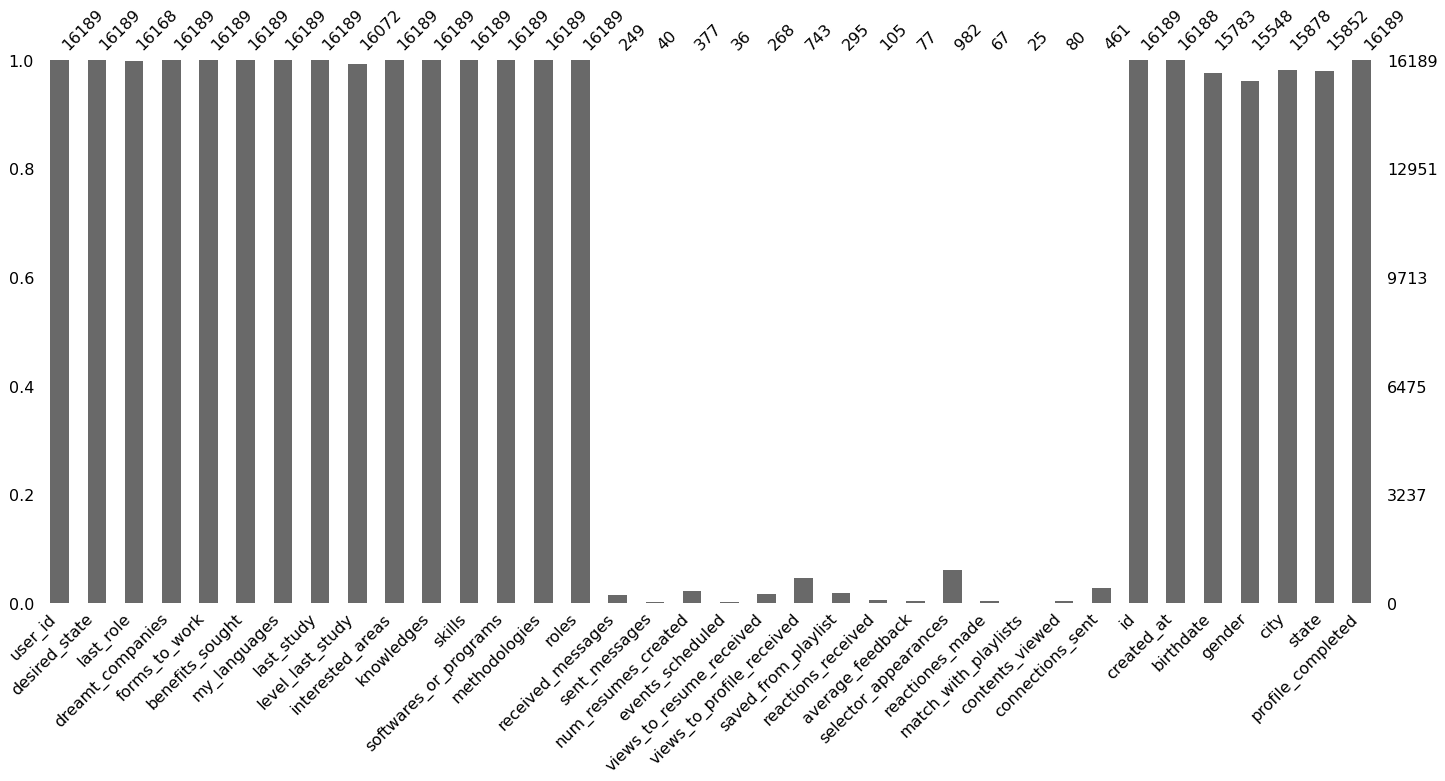

In [4]:
import missingno as msno
msno.bar(data_users)

A continuación se muestra la cantidad de datos nulos o vacios por cada columna.

In [5]:
data_users.isnull().sum()

user_id                          0
desired_state                    0
last_role                       21
dreamt_companies                 0
forms_to_work                    0
benefits_sought                  0
my_languages                     0
last_study                       0
level_last_study               117
interested_areas                 0
knowledges                       0
skills                           0
softwares_or_programs            0
methodologies                    0
roles                            0
received_messages            15940
sent_messages                16149
num_resumes_created          15812
events_scheduled             16153
views_to_resume_received     15921
views_to_profile_received    15446
saved_from_playlist          15894
reactions_received           16084
average_feedback             16112
selector_appearances         15207
reactiones_made              16122
match_with_playlists         16164
contents_viewed              16109
connections_sent    

Quiero empezar con una limpieza de los tipo de datos en texto

In [6]:
# Lista con las columnas con dtype object o texto
columnasText= ['desired_state', 'last_role', 'dreamt_companies', 'forms_to_work', 'benefits_sought', 'my_languages', 'last_study', 'level_last_study', 'interested_areas', 'knowledges', 'skills', 'softwares_or_programs', 'methodologies', 'roles', 'created_at', 'birthdate', 'gender', 'city', 'state']

Se modifican los valores vacios con la expresión "No responde" para hacer entender que el usuario no completó el perfil.

In [7]:
# loop para sustituir valores nulos de la lista "columnasText en "no responde" con .fillna
for colum1 in columnasText:
    data_users[colum1].fillna('No_responde', inplace=True)

Por un analisis exploratorio del nuevo csv, se evidencia que en la mayoria de las columnas, los datos nulos estan con [], o indican un [none], o '[None, None, None]', por lo que a continuación se revisara los valores nulos de cada columna y las veces que se repiten para proximamente modificar estos valores.


In [8]:
#Revizar cada columna del df
for colum2 in columnasText:
    contar = data_users[colum2].value_counts()
    
    # lista de nulos y loop para ver las veces que se repiten valores nulos x columna
    vacios = ['[None]', '[]', '[None, None, None]', '', '[[None, None, None]]' ]
    for vacio in vacios:
        if vacio in contar.index:
            print(f"En la columna {colum2} hay {contar[vacio]} valores nulos de tipo {vacio}.")

En la columna dreamt_companies hay 58 valores nulos de tipo [None].
En la columna dreamt_companies hay 6621 valores nulos de tipo [].
En la columna dreamt_companies hay 192 valores nulos de tipo [None, None, None].
En la columna forms_to_work hay 4998 valores nulos de tipo [].
En la columna benefits_sought hay 5422 valores nulos de tipo [].
En la columna my_languages hay 1094 valores nulos de tipo [].
En la columna my_languages hay 1273 valores nulos de tipo [[None, None, None]].
En la columna interested_areas hay 3067 valores nulos de tipo [].
En la columna knowledges hay 4932 valores nulos de tipo [].
En la columna skills hay 4976 valores nulos de tipo [].
En la columna softwares_or_programs hay 5177 valores nulos de tipo [].
En la columna methodologies hay 6302 valores nulos de tipo [].
En la columna roles hay 13628 valores nulos de tipo [].


Ahora es necesario reemplazar cada valor nulo en las columnas anteriores por un "no responde"

In [9]:
#loop para reemplazar valores nulos con "No responde"
for colum3 in columnasText:
    data_users[colum3] = data_users[colum3].replace(['', '[]', '[None]', '[None, None, None]', '[[None, None, None]]'], 'No_responde')

Comprobamos si los datos nulos en las columnas de texto se modificaron utilizando nuevamente .isnull

In [10]:
data_users.isnull().sum()

user_id                          0
desired_state                    0
last_role                        0
dreamt_companies                 0
forms_to_work                    0
benefits_sought                  0
my_languages                     0
last_study                       0
level_last_study                 0
interested_areas                 0
knowledges                       0
skills                           0
softwares_or_programs            0
methodologies                    0
roles                            0
received_messages            15940
sent_messages                16149
num_resumes_created          15812
events_scheduled             16153
views_to_resume_received     15921
views_to_profile_received    15446
saved_from_playlist          15894
reactions_received           16084
average_feedback             16112
selector_appearances         15207
reactiones_made              16122
match_with_playlists         16164
contents_viewed              16109
connections_sent    

A partir del paso 3, en el que se usa data_users.head(5) me di cuentas de que algunas columnas mostraban sus datos en listas dentro de [''], a continuación se muestra un ejemplo en la lista 'benefits_sought'

In [11]:
# Frecuencia de datos en la columna
conteo = data_users['benefits_sought'].value_counts().head(5)
print(conteo)

No_responde                                                 5422
['formation']                                                196
['study_opportunities']                                      121
['study_opportunities', 'laboral_training', 'formation']      76
['flexible_schedules']                                        70
Name: benefits_sought, dtype: int64


Lo que quiero hacer ahora es un loop que me permita modificar el texto de las columnas y eliminar los corchetes.

Luego hago un loop para ver el top 5 de los valores que mas se repite por cada una de las columnas y poder identificar en cuales debo realizar cambios

In [12]:
import re
# Defino el patron que deseo eliminar en "patrones", los [] '' y luego le indico en "patron" que deje strings
patrones = re.compile(r"[\[\]\'']")  
patron = re.compile(r"[^\w']+")

# creo un loop sobre cada columna en la lista columnasList creada anteriormente
for columna in columnasText:
    # Aplico los patrones
    data_users[columna] = data_users[columna].apply(lambda x: patrones.sub('', x))
    data_users[columna] = data_users[columna].apply(lambda x: patron.sub(' ', x.lower()))

    # quiero ver la frecuencia con que se repitan los datos en las columnas de texto, el top 5
    frecuencia = data_users[columna].value_counts().head(5)

    # Esta linea es para alinear la frecuencia según la longitud de el dato mas largo por columna
    alinear = max([len(str(datos)) for datos, fre in frecuencia.items()])

    # Imprimo las respuestas y alineo los datos, el \n es para dar un salto de linea entre las columnas
    print(f"\n Columna: {columna}")
    for datos, fre in frecuencia.items():
        print(f"\t{datos.ljust(alinear)}    {fre}")
        



 Columna: desired_state
	employment      9832
	first_job       2857
	freelancer      1773
	entrepreneur    979
	practice        748

 Columna: last_role
	estudiante                   531
	docente                      281
	desarrollador                185
	auxiliar administrativo      132
	desarrollador de software    115

 Columna: dreamt_companies
	no_responde                      6871
	google                           85
	www google com                   56
	https www google com             33
	https www microsoft com es co    28

 Columna: forms_to_work
	no_responde               4998
	mixed                     1384
	in_house virtual mixed    1253
	virtual                   1240
	virtual mixed             938

 Columna: benefits_sought
	no_responde                                       5422
	formation                                         196
	study_opportunities                               121
	study_opportunities laboral_training formation    76
	flexible_schedules           

Revisamos nuevamente si el cambio de eliminar los corchetes quedó guardado imprimiendo conteo

In [13]:
conteo = data_users['benefits_sought'].value_counts().head(5)
print(conteo)

no_responde                                       5422
formation                                          196
study_opportunities                                121
study_opportunities laboral_training formation      76
flexible_schedules                                  70
Name: benefits_sought, dtype: int64



Con la impresión de datos por frecuencia evidencié en primer lugar que en last_study habían respuestas multiples por tildes y mayusculas.

A continuación Importo unidecode para que el df se eliminen las tildes y los datos esten en minuscula

In [14]:
import unidecode
# Loop ´para eliminar tildes y mayusculas en columnas de texto
for col in columnasText:
    data_users[col] = data_users[col].astype(str).apply(lambda x: unidecode.unidecode(x).lower())

conteo = data_users['last_study'].value_counts().head(5)
print(conteo)

ingenieria de sistemas                              1149
ingenieria industrial                                531
ingenieria electronica                               506
administracion de empresas                           462
analisis y desarrollo de sistemas de informacion     344
Name: last_study, dtype: int64



Tambien se evidencia que en genero hay datos erroneos, por lo que se reemplaza '0' con no_responde y se decide omitir al momento de realizar las tablas, haciendo un filtro para omitir respuestas diferentes a "F" y "M".

In [15]:
# Reemplazo de 0 en columna gender
data_users['gender'] = data_users['gender'].replace(['0'], 'no_responde')


conteo = data_users['gender'].value_counts().head(5)
print(conteo)

m              10487
f               5042
no_responde      642
other             18
Name: gender, dtype: int64


 #### Datos numericos

Para hacer la limpieza de datos numericos se evidencia que sería necesario eliminar miles y miles de filas y se perderia información importante pues no hay una cantidad considerable de datos para sacar la media y ponerla en los espacios vacios, se decide continuar el analisis sin hacer modificaciones a estos datos.

## Insight Discovery 

### Top 5 roles por genero

In [16]:
#filtro para gender sera f y m
filtro = data_users.loc[data_users['gender'].isin(['f', 'm']), :]

#agrupo el genero por los roles y calculo la frecuencia de los roles
roles_by_gender = filtro.groupby('gender')['roles'].value_counts()

# pongo el top 5
top5 = roles_by_gender.groupby('gender').nlargest(5)
print(top5)

gender  gender  roles                    
f       f       no_responde                  4487
                analista de datos               8
                desarrollador junior            8
                desarrollador de software       6
                programador junior              6
m       m       no_responde                  8541
                desarrollador junior           68
                desarrollador de software      45
                desarrollador web              35
                desarrollador                  31
Name: roles, dtype: int64


Se evidencia una gran cantidad de personas que no respondieron los roles, en especial el genero masculino, mientras que en el top uno se encuentra el rol de desarrollador junior para ambos generos.

### Top 5 roles with the highest average_feedback by gender

In [17]:
#utilizo el filtro por genero y agrupo las columnas necesarias
average = filtro.groupby(['gender', 'roles'])['average_feedback'].mean().reset_index()

# ordeno por average_feedback y se muestra el top 5 por género
roles_gender_feedback = average.groupby('gender').apply(lambda x: x.nlargest(5, 'average_feedback')).reset_index(drop=True)

print(roles_gender_feedback)

  gender                                              roles  average_feedback
0      f                           mas prueba disenadora ux             5.000
1      f                       ceo en una empresa legaltech             4.750
2      f  coordinador lider de sistemas de gestion integ...             4.750
3      f                          desarrolladora web junior             4.670
4      f                                        no_responde             4.625
5      m                          consultor bi dddm process             5.000
6      m                      consultor empaques ecologicos             5.000
7      m     desarrollador de software desarrollador junior             5.000
8      m                               desarrollador junior             5.000
9      m                                          developer             5.000


### Average views_to_resume_received by city

Evidenciamos que en la columna 'views_to_resume_received' no hay tantos datos, solo hay 268 divididos en vistas 1 y 3 veces por ciudad.

In [18]:
views = data_users['views_to_resume_received'].value_counts()

print(views)

1.0    267
3.0      1
Name: views_to_resume_received, dtype: int64


con la mayor cantidad en 1 vista por ciudad, por lo que el promedio de vistas del resume recivido por ciudad es de 1 a excepción de Bello - Antioquia que tuvo un promedio de 1,67

In [19]:
# calculamos el promedio de views agrupado por ciudad
promedio = data_users.groupby('city')['views_to_resume_received'].mean().sort_values(ascending=False).head(5)
print(promedio)

city
bello          1.666667
antioquia      1.000000
piedecuesta    1.000000
medellin       1.000000
molagavita     1.000000
Name: views_to_resume_received, dtype: float64


### Top Desired_stated x gender

Del siguiente analisis podemos concluir la cantidad de mujeres y hombres por cada "desired_state" o puesto deseado que esperan conseguir al utilizar TalentPitch, llegando al top el employment y first job y por ultimo el puesto de practicante.

In [20]:
stated_by_gender = filtro.groupby('gender')['desired_state'].value_counts()

# mostrar el top 5 de cada grupo
top_stated = stated_by_gender.groupby('gender').nlargest(5)

print(top_stated)

gender  gender  desired_state
f       f       employment       3225
                first_job         799
                freelancer        508
                entrepreneur      255
                practice          255
m       m       employment       6153
                first_job        1941
                freelancer       1224
                entrepreneur      702
                practice          467
Name: desired_state, dtype: int64


## Visualization

### Stacked bar plot of forms_to_work by level_last_study - Modalidad de trabajo por nivel de estudios

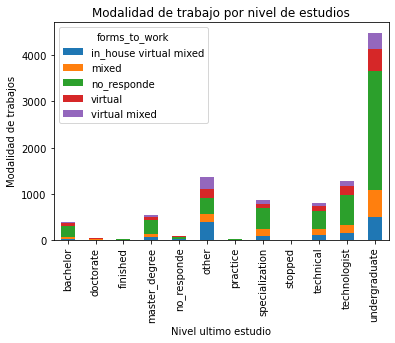

In [21]:
# Importo matplotlib para crear los grafico
import matplotlib.pyplot as plt

# programo el top 5 de modalidad de trabajo por estudios
top_modalidad = data_users['forms_to_work'].value_counts().head(5).index
modalidad = data_users[data_users['forms_to_work'].isin(top_modalidad)]
work_by_study = modalidad.groupby(['level_last_study', 'forms_to_work']).size().unstack()

# Creo el grafico de las barras apiladas
work_by_study.plot.bar(stacked=True)

# le pondo título y etiquetas a los ejes
plt.title('Modalidad de trabajo por nivel de estudios')
plt.xlabel('Nivel ultimo estudio')
plt.ylabel('Modalidad de trabajos')

# Mostrar el gráfico
plt.show()

Se puede evidenciar que la mayor parte de los encuestados no respondió, mientras que la mayoria de los que si respondieron, tienen nivel de estudio undergratuated y prefieren una modalidad de trabajo multiple elegida en el sigueinte orden "in house", "virtual" y "mixed", la modalidad que mas se repite sin importar el tipo de estudio que tiene la persona es "mixed".

### Heatmap of the most common languages by last_study 

In [22]:
# elimino la columna id pues es la misma "id_user"
data_users = data_users.drop('id', axis=1)

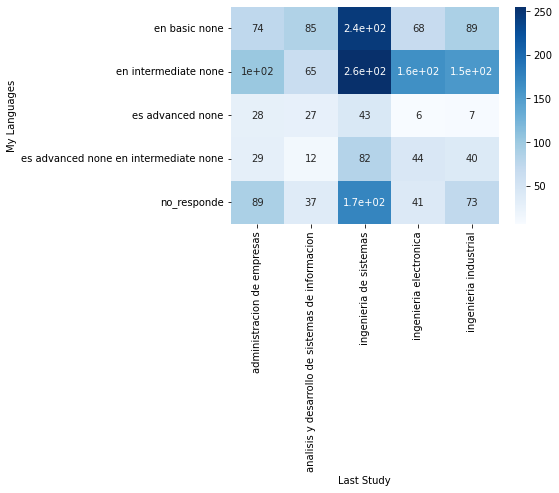

In [23]:
# importo seaborn para el grafico heatmap 
import seaborn as sns

#agrupo lenguajes por estudio y le pongo un top 5 a ambos
top_last_study = data_users['last_study'].value_counts().nlargest(5).index
top_my_languages = data_users['my_languages'].value_counts().nlargest(5).index

# filtro los datos 
data_top = data_users.loc[data_users['last_study'].isin(top_last_study) & data_users['my_languages'].isin(top_my_languages)]

# reorganizo los datos en una tabla pivote
table = data_top.pivot_table(index='my_languages', columns='last_study', values='user_id', aggfunc='count')

# creo el heatmap usando seaborn.heatmap()
sns.heatmap(table, annot=True, cmap='Blues')

# nombro etiquetas de los ejes
plt.xlabel('Last Study')
plt.ylabel('My Languages')

# lanzar grafico
plt.show()


Se puede evidenciar una mayor coincidencia en ultimo estudio de ingenieria de datos con un ingles intermedio, e ingles basico, en el nivel de ingles intermedio de sigue la ingenieria electronica, ing industrial y administración de empresas.

### Stacked bar plot of top 5 roles by gender .

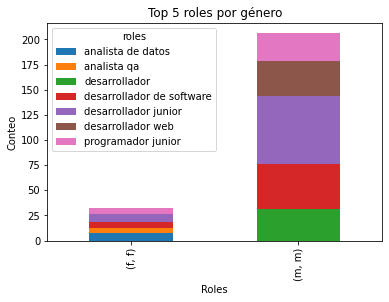

In [24]:
#Creo un filtro para eliminar la opcion no_responde de roles y continuo con el filtro de genero f y m
filtro = data_users[data_users['roles'] != 'no_responde']
filtro = filtro.loc[filtro['gender'].isin(['f', 'm']), :]  # filtro para gender
roles_by_gender = filtro.groupby('gender')['roles'].value_counts()


# agrupo el top 5 de cada grupo
top5 = roles_by_gender.groupby('gender').nlargest(5)

# Creo las barras apiladas
top5.unstack().plot(kind='bar', stacked=True)

# nombro el título y etiquetas de los ejes
plt.title('Top 5 roles por género')
plt.xlabel('Roles')
plt.ylabel('Conteo')

# lanzar grafica
plt.show()

Se evidencia una gran cantidad de personas que en ambos generos eligen el rol de programador junios, luego desarrollador junio y desarrollador web, hay mayor cantidad respuestas del genero masculino.

### Profile completed by gender

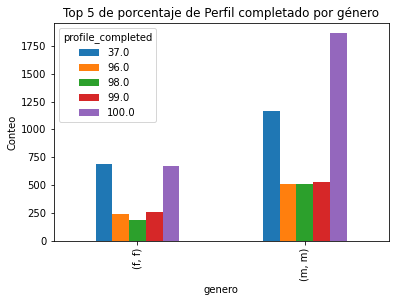

In [25]:
filtro_gender = data_users[data_users['gender'].isin(['f', 'm'])]
top_profile_completed = filtro_gender.groupby('gender')['profile_completed'].value_counts().groupby('gender').nlargest(5)

# Creo el gráfico de barras
top_profile_completed.unstack().plot(kind='bar')

# nombro título y etiquetas de los ejes
plt.title('Top 5 de porcentaje de Perfil completado por género')
plt.xlabel('genero')
plt.ylabel('Conteo')

# lanzo el grafico
plt.show()

Del grafico podemos evidencia que el mayor porcentaje que termina el perfil por completo es el genero masculino, mientras que en el genero femenino la mayoria suele dejar el perfil en un 37% completado.

### Top 5 last_study by city

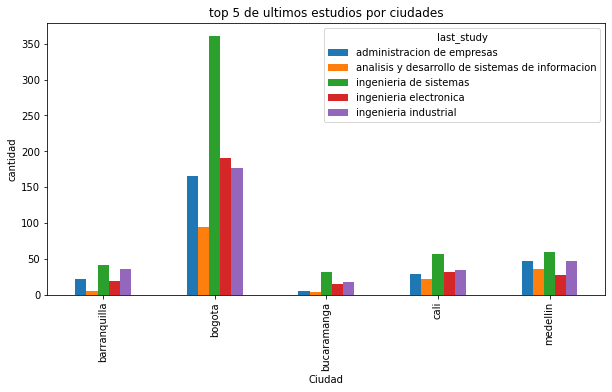

In [26]:
#Con head pido el top 5 de cada columna
top_last_study = data_users['last_study'].value_counts().head(5).index
top_city = data_users['city'].value_counts().head(5).index
data_top = data_users[data_users['last_study'].isin(top_last_study) & data_users['city'].isin(top_city)]

# Creo tabla pivote con los top 5 de cada columna
tabla = pd.pivot_table(data_top, values='user_id', index='city', columns='last_study', aggfunc='count')

# Creo el grafico de tipo bar
tabla.plot(kind='bar', figsize=(10, 5))

# nombro etiquetas de ejes y título
plt.xlabel('Ciudad')
plt.ylabel('cantidad')
plt.title('top 5 de ultimos estudios por ciudades')

# lanzo el gráfico
plt.show()

Se evidencia que bogotá es la ciudad con mayor estudios realizados por las personas inscritas a TalentPitch, siendo el top uno de estudios la ingenieria de sistemas, seguida por administración de empresas.

Gracias por su atención